# Exercise 1.5 | Text Mining

### Contents
##### 1. Importing Libraries
##### 2. Importing the .txt file
##### 3. Tokenize words & create plot of 10 most common words
##### 4. Remove 'stopwords', punctuation, and rerun the plot chart
##### 5. Create a tags list using TextBlob
##### 6. Create top 10 POS tags list
##### 7. Plot Top 10 POS list using seaborn
##### 8. Create bar plots for top 15 nouns, verbs & adjectives
##### 9. Create countries dataframe
##### 10. Plotting country mention frequency

##### 1. Importing Libraries (Task 2)

In [1]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\repla\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


##### 2. Importing the .txt file (Task 3)

In [2]:
# Importing the necessary txt file we scraped in Exercise 1.4

with open('20th_century_scrape', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

##### 3. Tokenize words & create plot of 10 most common words

In [3]:
# Task 4
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'are', 'at', 'the', 'top', 'of', 'the', 'page', '.', 'Search', 'Search', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1Historical', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historical', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1

In [4]:
# Next, we will create a 'Word frequency distrobution' list. We will use this to help create the plot chart

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4905 samples and 21284 outcomes>


In [5]:
dist_words.most_common(10)

[('.', 1568),
 ('the', 1099),
 (',', 990),
 ('of', 607),
 ('and', 398),
 ('to', 325),
 ('The', 318),
 ('[', 303),
 (']', 303),
 ('in', 293)]

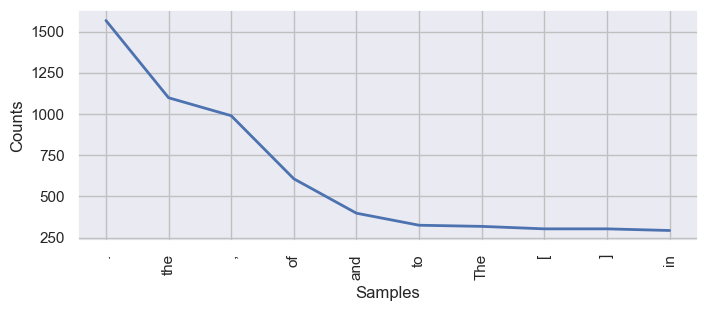

In [6]:
# Creating the Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

##### 4. Remove 'stopwords', punctuation, and rerun the plot chart

In [7]:
# We will remove stopwords, and clean up punctuation, before running the plot chart again (Task 5)

# Import stopwords from NLTK
from nltk.corpus import stopwords

In [8]:
stop_words = set(stopwords.words('english'))

In [9]:
# Removing stopwords in words

filtered_words = []  # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [10]:
# Create a new FreqDist for filtered–words

dist_words_filter = FreqDist(filtered_words)
print (dist_words_filter)

<FreqDist with 4802 samples and 16608 outcomes>


In [11]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [12]:
sans_punc

'  Key    events      th    century         Wikipedia    Jump    content    Main    menu    Main    menu    move    sidebar    hide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    file    Languages    Language    links    top    page         Search    Search    Create    account    Log    Personal    tools    Create    account    Log    Pages    logged    editors    learn    ContributionsTalk    Contents    move    sidebar    hide         Top          Historical    events      th    century    Toggle    Historical    events      th    century    subsection       The    world    beginning    century                   The    war    end    wars               World    War    I                                          The    Russian    Revolution    Communism       Between    wars         Economic    depression         The    rise    dictatorship      

In [13]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'top', 'page', 'Search', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historical', 'events', 'th', 'century', 'Toggle', 'Historical', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turnin

In [14]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

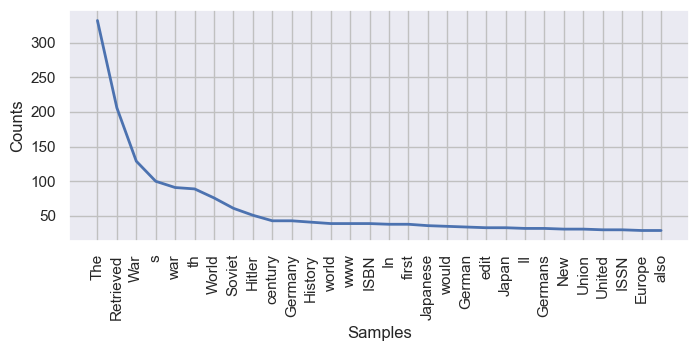

In [15]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [16]:
# Task 5 Feedback - Even at a glance, this updated list is drastically different than the initial list. The cleaning goes a long way to making it much nicer!
# I'm seeing some duplicates that are only differentiated by case (ex War, war) as well as pluralization (ex German, Germans, Germany, etc) 
# Still a couple of roque characters in there as well. 's', 'th', 'www' and 'ISBN'. I'll clean this up a bit more

In [17]:
dist_words_filter_2.most_common(20)

[('The', 332),
 ('Retrieved', 206),
 ('War', 129),
 ('s', 100),
 ('war', 91),
 ('th', 89),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 51),
 ('century', 43),
 ('Germany', 43),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34)]

In [18]:
new_stopwords_2 = ["s", "th", 'www', 'ISB']

In [21]:
# Removing more stopwords
filtered_dist_words_filter_2 = [(word, count)
                                for word, count in dist_words_filter_2.items() 
                                if word not in new_stopwords_2]

In [22]:
new_freq_dist = FreqDist(dict(filtered_dist_words_filter_2))
print (new_freq_dist)

<FreqDist with 4064 samples and 10599 outcomes>


In [24]:
new_freq_dist.most_common(20)

[('The', 332),
 ('Retrieved', 206),
 ('War', 129),
 ('war', 91),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 51),
 ('century', 43),
 ('Germany', 43),
 ('History', 41),
 ('world', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34),
 ('edit', 33),
 ('Japan', 33),
 ('II', 32)]

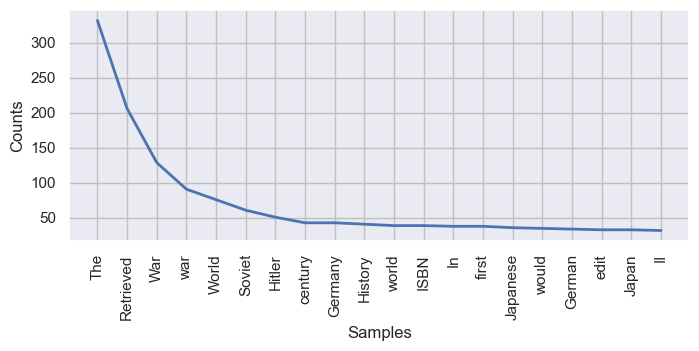

In [25]:
# Creating a new Frequency Distribution Plot

plt.figure(figsize=(8, 3))
new_freq_dist.plot(20, cumulative = False)
plt.show()

In [26]:
# I feel a lot better about this list, as we have removed the random characters from the list that were unrelated!

##### 5. Create a tags list using TextBlob

In [48]:
new_stopwords2 = ["And", "Then", 'n', 't', 's', 'The']

In [49]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords2:
        filtered.append(word)

In [50]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 9.14 ms


In [51]:
text

TextBlob("['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'top', 'page', 'Search', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historical', 'events', 'th', 'century', 'Toggle', 'Historical', 'events', 'th', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation',

In [52]:
tags_list = text.tags

In [53]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Languages", 'NNS'),
 ("'", 'POS'),
 ("'Language", 'NN'),
 ("'links", 'NNS'),
 ("'", 'POS'),
 ("'top", 'NNP'),
 ("'", 'POS'),
 ("'page", 'NN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'N

##### 6. Create top 10 POS tags list

In [54]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [71]:
df_text.head(10)

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS
5,'th,NNP
6,',POS
7,'century,NNP
8,',POS
9,'Wikipedia,NNP


##### 7. Plot Top 10 POS list using seaborn

In [81]:
# Task 8 - With the help of AI, we've sorted our values into order of highest occurance to least, and plotted them in a bar using seaborn 

In [77]:
word_type_totals = df_text['Word type'].value_counts().reset_index()
word_type_totals.columns = ['Word type', 'Total Frequency']

In [78]:
word_type_totals_sorted = word_type_totals.sort_values(by='Total Frequency', ascending=False)

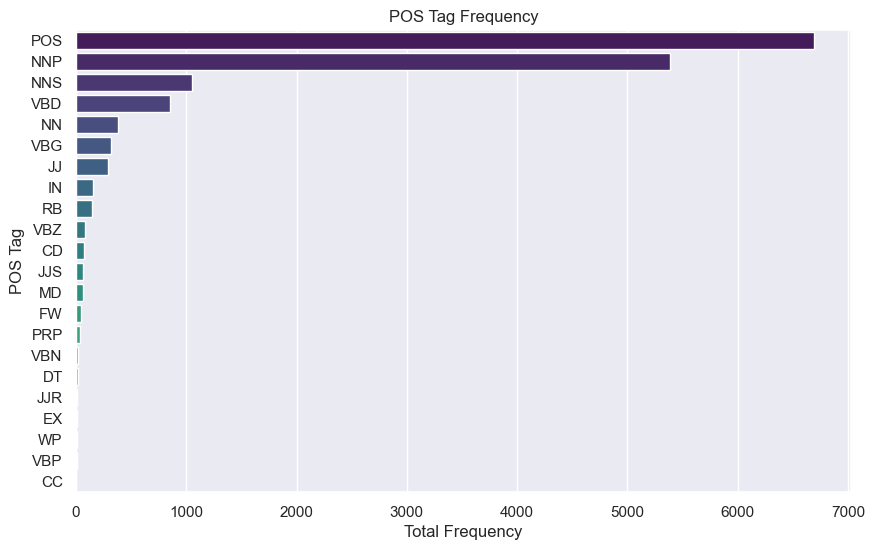

In [80]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Total Frequency', y='Word type', data=word_type_totals_sorted, palette='viridis')
plt.title('POS Tag Frequency')
plt.xlabel('Total Frequency')
plt.ylabel('POS Tag')
plt.show()

##### 8. Create bar plots for top 15 nouns, verbs & adjectives

In [96]:
# Task 9 - Below you will find top 15 bar plots for nouns, verbs and adjectives. All were grouped by their 'wordtype' before creating the plots
# To begin, we created a 'wordtype' plot to help us understand the most frequently used types. After this is completed, you can see the breakdowns for nouns (NN), verbs (VB, VBD), and adjectives (JJ)

In [56]:
# Grouping words by their 'wordtype'
df_t = df_text.groupby('Word type').count().reset_index()

In [57]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,14
3,EX,12
4,FW,43


In [83]:
# creating list of top 15 words
top15 = df_t.nlargest(15, 'Words')

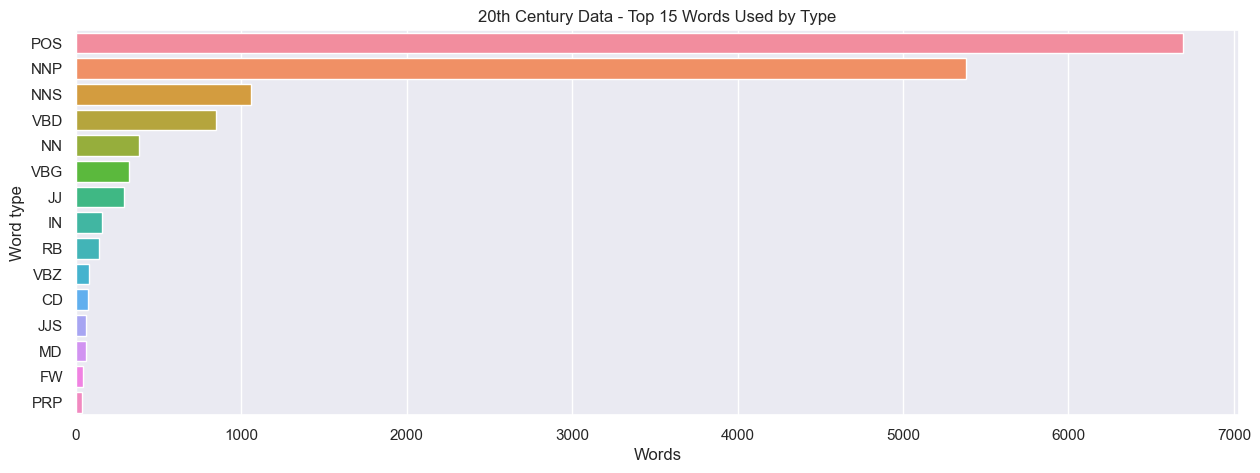

In [84]:
# Creating the Bar Plot

plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top15).set_title("20th Century Data - Top 15 Words Used by Type")

In [86]:
# looking through top 15 nouns in the article (NN)

df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15nouns = y.nlargest(15, 'Occurrences')

In [87]:
top15nouns

,Word,Occurrences
102,'Germans,32
246,'Union,31
719,'weapons,24
7,'Allies,19
728,p,18
439,'forces,18
365,'countries,17
123,'Jews,17
540,'nations,14
374,'days,13


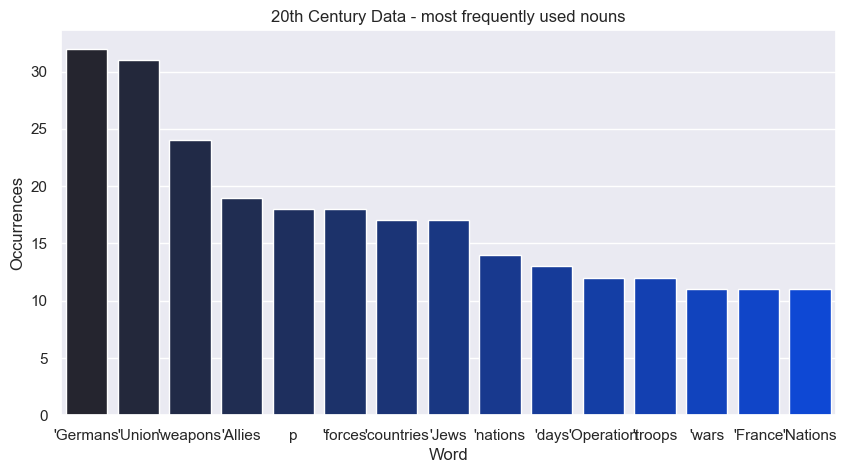

In [88]:
# Plotting our top 15 nouns

plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurrences",
    saturation=0.9, data = top15nouns).set_title("20th Century Data - most frequently used nouns")

In [89]:
# Looking at top 15 verbs in the article now

df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15verbs = y.nlargest(15, 'Occurrences')

In [90]:
top15verbs

,Word,Occurrences
26,'Retrieved,206
35,'United,30
0,'Allied,19
195,'led,15
315,'used,13
193,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
307,'turned,7


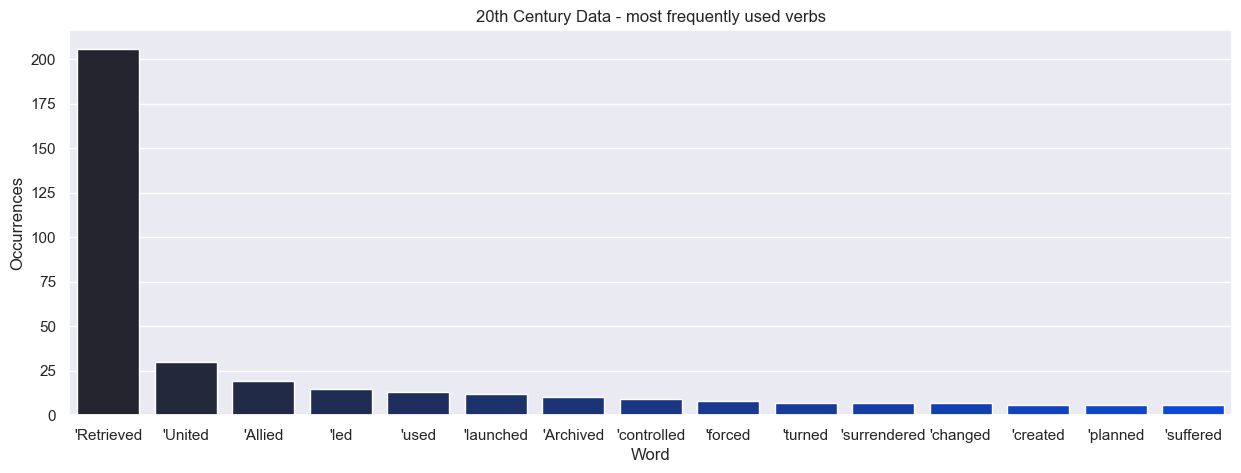

In [92]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurrences",
    saturation = 0.9, data = top15verbs).set_title("20th Century Data - most frequently used verbs")

In [93]:
# looking at top 15 adjectives now

df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurrences'], ascending=False)
top15adj = y.nlargest(15, 'Occurrences')

In [94]:
top15adj

,Word,Occurrences
28,'Japanese,36
2,'American,24
5,'Atlantic,13
20,'Guardian,10
14,'Chinese,7
43,'Russian,6
1,'African,6
104,'political,6
7,'Baltic,5
105,'possible,5


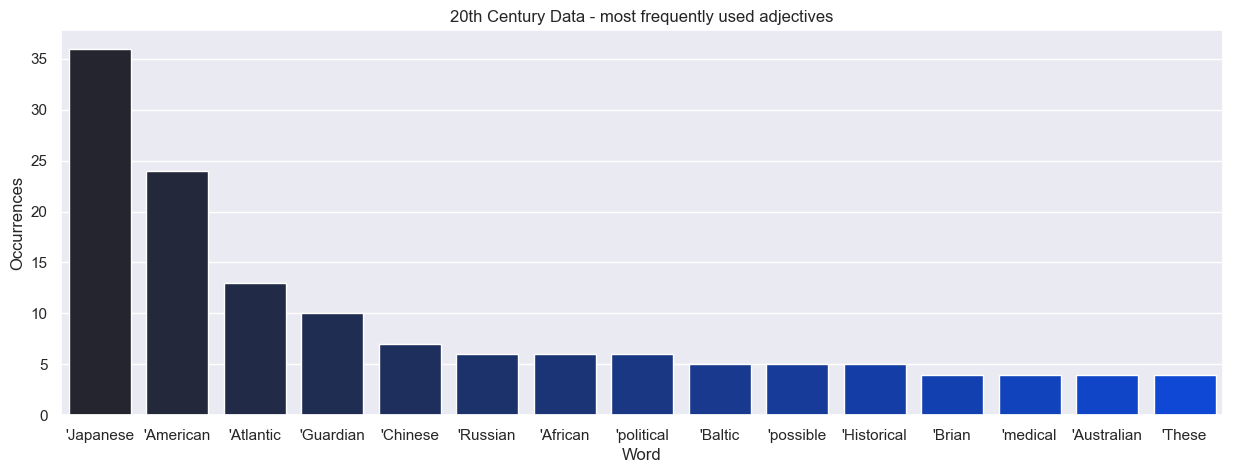

In [95]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurrences",
    saturation=0.9, data=top15adj).set_title("20th Century Data - most frequently used adjectives")

In [97]:
# Task 9 - Feedback: "what do you think stands out in these frequencies?"
# What jumps out right away is German, Japanese, United, States, Atlantic... this looks like World War II information to me. Just a hunch, anyways.

##### 9. Create countries dataframe

In [98]:
# Task 10 - Creating the countries dataframe, and the number of times they're mentioned in the text

In [99]:
# Defining the file path

file_path = "C:\\Users\\repla\\OneDrive\\Documents\\School\\Data Visualizations with Python\\20th-century\\countries_list_20th_century_1.5.csv"

In [100]:
# Import the CSV file into a dataframe named 'countries'

countries = pd.read_csv(file_path)

In [103]:
pd.set_option('display.max_rows', None)

In [104]:
print(countries)

     Unnamed: 0                          country_name
0             1                          Afghanistan 
1             2                              Albania 
2             3                              Algeria 
3             4                              Andorra 
4             5                               Angola 
5             6                  Antigua and Barbuda 
6             7                            Argentina 
7             8                              Armenia 
8             9                            Australia 
9            10                              Austria 
10           11                            Azerbaijan
11           12                         Bahamas, The 
12           13                              Bahrain 
13           14                           Bangladesh 
14           15                             Barbados 
15           16                              Belarus 
16           17                              Belgium 
17           18             

In [105]:
# Renaming the columns for clarity

countries = countries.rename(columns={'country_name': 'country', 'Unnamed: 0': 'count'})

In [106]:
countries.head()

,count,country
0,1,Afghanistan
1,2,Albania
2,3,Algeria
3,4,Andorra
4,5,Angola


In [107]:
# Count occurrences of each country
country_counts = countries['country'].value_counts().reset_index()

In [108]:
# Rename columns
country_counts.columns = ['country', 'count']

In [109]:
# Display the updated dataframe
print(country_counts)

                                  country  count
0                            Afghanistan       1
1                                 Malawi       1
2                               Pakistan       1
3                                  Palau       1
4                              Palestine       1
5                                 Panama       1
6                       Papua New Guinea       1
7                               Paraguay       1
8                                   Peru       1
9                            Philippines       1
10                                Poland       1
11                               Portugal      1
12                                  Qatar      1
13                               Romania       1
14                                Russia       1
15                                 Rwanda      1
16                 Saint Kitts and Nevis       1
17                           Saint Lucia       1
18      Saint Vincent and the Grenadines       1
19                  

In [110]:
country_counts.head()

,country,count
0,Afghanistan,1
1,Malawi,1
2,Pakistan,1
3,Palau,1
4,Palestine,1


##### 10. Plotting country mention frequency

In [117]:
# Task 11 - Create a plot showing the frequency of the number of times these countries are mentioned in the text

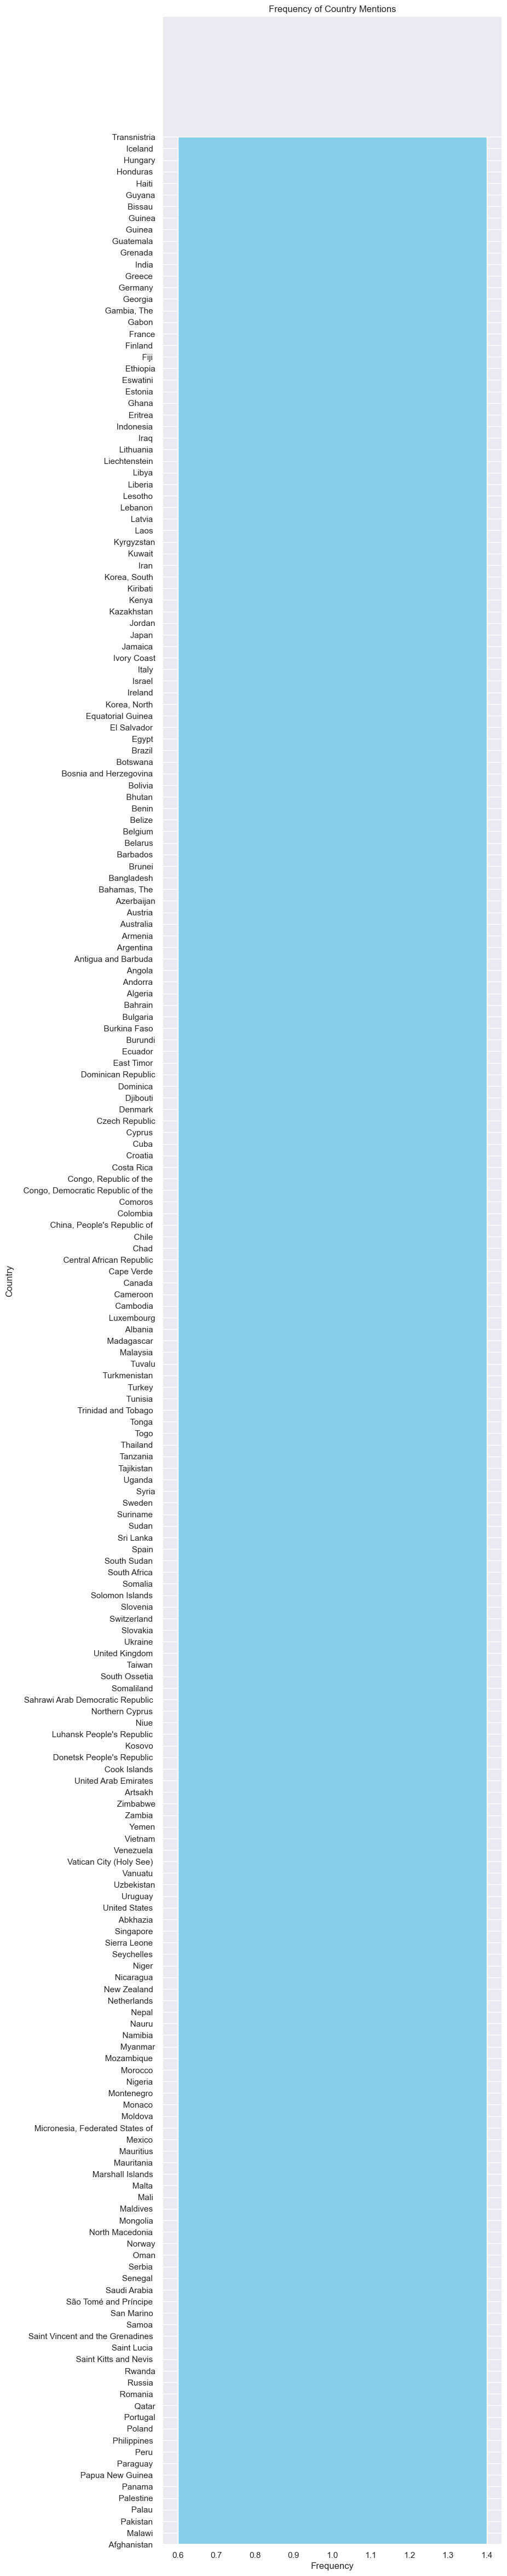

In [116]:
# Plot frequency of country mentions
plt.figure(figsize=(8, 60))
plt.bar(country_counts['count'], country_counts['country'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Frequency of Country Mentions')
plt.grid(axis='x')
plt.show()

In [118]:
# I've reviewed the document myself, as it was provided in the Task for this Exercise. it appears to me each country is mentioned exactly once. This may be true, or it may be an error as the file is incorrect? I am unsure at this time